In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
def geo_growth(f, p, b):
    r = p* np.log(1+b*f) +(1-p)*np.log(1 -f)
    return r

def kelly_bet(p, b):
    f = (p*b + p -1)/b
    if f < 0:
        f = 0
    elif f ==1:
        f =0.999
    
    return f

def frac_plot(p, b):
    ret = 2 *(1-p)**(1-p)*p**p - 1
    
    return ret
    
def even_bet_kelly (p):
    frac = 2*p -1
    
    if frac < 0:
        frac = 0
    elif frac ==1:
        frac =0.999
    return(frac)
    

# Kelly Criterion in Discrete settings


The Kelly criterion is the best way to maximize long term wealth. In this script I will show how it can be utilized in binary events and its implications for fractional or multiple kelly.


The Kelly criterion is calculated by maximizing the geometric growth, which for a binary event is $p\dot \ln(1+bf)+q\dot\ln(1−f)$. 

Take a coin with a probability $p$ to win $x$ unit and probability $q$ or $1-p$ to lose $x$. Then the optimal betting size of total wealth is 

$ f^* = p - q $ Even bet

but if one has different payoff such as winning x and losing y, then the Kelly Criterion is

$f^* = \frac{bp - q}{b}$ where $b = \frac{x}{y}$



### Even bet, different probabilities

In [3]:
n=100
x = np.linspace(0,1,n)



In [10]:
p_array = [0.25,0.5,0.6,0.7,0.8, 0.9, 1]

result = np.empty((len(p_array), n))

for i in range(len(p_array)):
    growth_line = geo_growth(x, p_array[i], 1)
    result[i, :] = growth_line


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


In [11]:
kelly_frac = []
for p in p_array:
    f = kelly_bet(p, 1)
    if f <0:
        f=0
    kelly_frac.append(f)

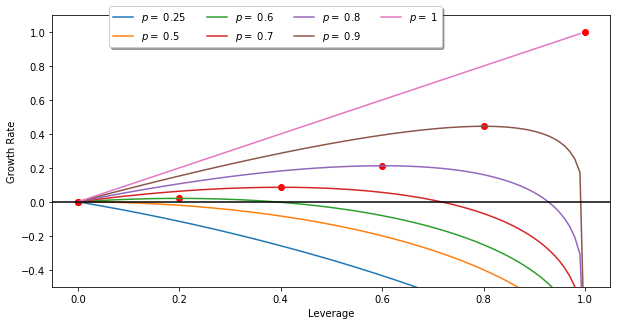

In [12]:
plt.figure(figsize=(10,5))
for i in range(len(p_array)):
    plt.plot(x, np.exp(result[i])-1, label = "$p =$ " + str(p_array[i]))

for i in range(len(p_array)):
#    plt.scatter(kelly_frac[i], frac_plot(p_array[i], b), c ='red', alpha = 1, linewidths = 0.3)
    plt.scatter(even_bet_kelly(p_array[i]), np.exp(geo_growth(even_bet_kelly(p_array[i]), p_array[i], 1))-1,
                color = 'red')


#plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.4, 1.05),
          ncol=4, fancybox=True, shadow=True)
plt.ylim(-0.5, 1.1);
plt.xlim(-0.05, 1.05);
plt.ylabel('Growth Rate');
plt.xlabel('Leverage');
plt.axhline(y=0, color = 'black');



### Different bet, same probabilities

But what if we have a 50/50 bet? How much should we bet?


In [13]:
P = 1/2
B = np.linspace(1,10,6)
result_even_odds = np.empty((len(B), n))

for i in range(len(B)):
    growth_line = geo_growth(x, P, B[i])
    result_even_odds[i, :] = growth_line

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


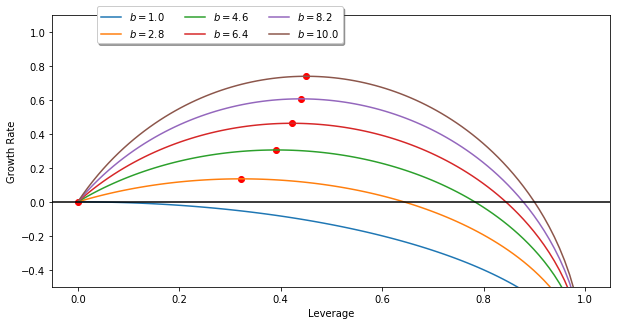

In [14]:
plt.figure(figsize=(10,5))
for i in range(len(B)):
    plt.plot(x, np.exp(result_even_odds[i])-1, label = "$b = $" + str(B[i]));
    plt.scatter(kelly_bet(P, B[i]), np.exp(geo_growth(kelly_bet(P,B[i]), P, B[i]))-1,
                color = 'red');
plt.legend(loc='upper center', bbox_to_anchor=(0.3, 1.05),
          ncol=3, fancybox=True, shadow=True);
plt.ylabel('Growth Rate');
plt.xlabel('Leverage');
plt.ylim(-0.5, 1.1);
plt.xlim(-0.05, 1.05);
plt.axhline(y=0, color = 'black');

As one can see, the payoff has less of a impact of the betting size than the probability of the win. So one can take higher estimation errors of the payoff but not of the chance of the payoff.

Also note that a bet with positive expectation will provide negative growth rate and poverty if one overbets. This is why full Kelly is the maximum and half kelly might be smart. 

### Different Bet, Different Probabilities

### Approximations



If one have two assets where $a_1, a_2$ are the percentage gain for assets 1 and 2, also $b_1, b_2$ are the percentage loss for the same. $\rho$ is the correlation of the assets and $p$ is the possability of comovments which is defined as $p = \frac{\rho + 1}{2}$.


If one does a taylor expansion of the geometric growth one will find that the geometric growth, $g = \mu - \frac{\sigma^2}{2}$ where $\mu = \frac{a-b}{2}$ and $\sigma^2 = \frac{a+b}{2}$. This is the same as for the continous case. 

The optimal weight for an asset, say asset 1, is calculated as $ w_A = \frac{\mu_1-\mu_2 + (\sigma_2 -\rho\sigma_1)\sigma_2}{\sigma_1^2 + \sigma_2^2 - 2\rho\sigma_1\sigma_2}$

If $w_1 + w_2 < 1$, then the rest of the bankroll is held in cash. 

CAUTION: This formula only works for two assets. The formula also has the implicit constrants of no leverage and no short selling.

In [104]:
def theoretical_kelly_lev(mu_1, mu_2, s_1, s_2, corr):
    
    weight_1 = (mu_1 -mu_2 +(s_2 - corr * s_1)*s_2)/(s_1**2+s_2**2 - 2*corr*s_1*s_2)
    weight_2 = (mu_2 -mu_1 +(s_1 - corr * s_2)*s_1)/(s_1**2+s_2**2 - 2*corr*s_1*s_2)
    
    cash = 1- weight_1 - weight_2
    
    return (weight_1, weight_2, cash)

# Shannons Demon/Parrandos Paradox

Shannons Deamon is the counter intuitive fact that one can construct a portfolio with positive return from assets with no or negative geometric return. This is due to optimal sizing of bets which can be dedced with Kellys Criterion above. For a first illustration I will show how one can construct a portfolio with positive geometric return with one coin which has a $50\%$ of a $100\%$ return and $50\%$ for a $50\%$ loss. 

As one can calculate from the formulas above the arithemtic mea, $\mu$, is $25\%$, the geometric mean, $g$, is $0\%$ and the standard deviation,$\sigma$, is $75\%$.  

In [115]:
def coin_prop(profit, loss):
    
    profit = profit +1
    loss = loss +1
    mean = (profit-loss)/2
    std = (profit+loss)/2
    
    return mean, std

In [117]:
profit = 1
loss = -0.5 #percent


mean, std = coin_prop(profit, loss)
coin_1, coin_2, cash = theoretical_kelly_lev(mean, 0, std, 0, 0)

As one can see the optimal weight for the coin is $44\%$ from the kelly criterion, and the remaining weight will be held in cash.

In [118]:
coin_weight = coin_1
cash_weight = 1 - coin_weight
runs = 1000


outcome =pd.DataFrame(np.random.binomial(1, 0.5, size = runs))
outcome[outcome==1]=(profit+1)
outcome[outcome==0] = (loss+1)
outcome.iloc[0] = 1

init_coin_cash = 1
coin_cash_return = []
for i in range(runs):
    coin_cash_return.append(init_coin_cash)
    cash = float(init_coin_cash * cash_weight)
    coin = float(init_coin_cash * coin_weight)
    coin = float(coin * outcome.loc[i])
    init_coin_cash = coin + cash
    
cash = [1] * runs

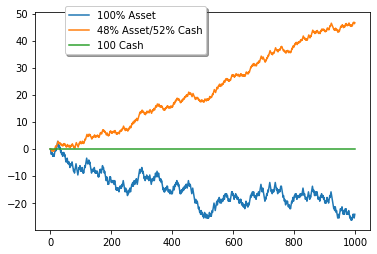

In [119]:
plt.plot(np.log(outcome.cumprod()), label = "100% Asset")
plt.plot(np.log(coin_cash_return), label = str(round(coin_weight*100))+"% Asset/"+ str(round(cash_weight*100))+"% Cash")
plt.plot(np.log(cash), label = "100 Cash")
plt.legend(loc='upper center', bbox_to_anchor=(0.3, 1.05),
          ncol=1, fancybox=True, shadow=True);

## Two Coin Example

If we instead have two independent identical coins as above we find out that our optimal allocation is $50\%$ in each coin. 

In [120]:
coin1_weight,coin2_weight,cash2_weight =  theoretical_kelly_lev(mean, mean, std, std, 0)

In [121]:
outcome_2 = pd.DataFrame(np.random.binomial(1, 0.5, size = runs))
outcome_2[outcome_2==1]=(profit+1)
outcome_2[outcome_2==0] = (loss+1)
outcome_2.iloc[0] = 1

coins_return = []
init_coins_cash = 1

for i in range(runs):
    coins_return.append(init_coins_cash)
    
    coin1 = float(init_coins_cash * coin1_weight)
    coin2 = float(init_coins_cash * coin2_weight)
    cash = float(init_coins_cash * cash2_weight)
    
    coin1 = float(coin1 * outcome.loc[i])
    coin2 = float(coin2 * outcome_2.loc[i])
    
    init_coins_cash = coin1 + coin2 + cash

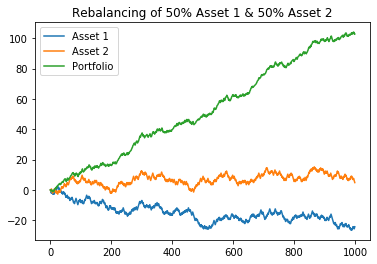

In [122]:
plt.plot(np.log(outcome.cumprod()), label = "Asset 1")
plt.plot(np.log(outcome_2.cumprod()), label = "Asset 2")
plt.plot(np.log(coins_return), label = "Portfolio")
plt.legend();
plt.title("Rebalancing of " + str(round(coin1_weight*100))+"% Asset 1 & "+ str(round(coin2_weight*100))+"% Asset 2");

In [84]:
coin1_weight

0.5